In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
# Read in the dataset
df = pd.read_csv('../data/raw/life_style.csv')
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,Workout,BMI_calc,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,Dumbbell flyes,24.870447,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,Lateral raises,23.479709,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,Standing calf raises,21.148123,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,Incline dumbbell flyes,32.449827,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,Military press,14.831372,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176


In [3]:
# checking the number of rows and columns in the dataset
df.shape

(20000, 53)

In [4]:
df.Calories.describe()

count    20000.000000
mean      2024.418300
std        541.891521
min        781.000000
25%       1634.000000
50%       1919.000000
75%       2360.000000
max       3641.000000
Name: Calories, dtype: float64

* Dataset has 20,000 rows and 53 Columns. It is important to note we dont need all the columns for our analysis.
* Hence we will the selecting some column from the dataset for building the calorie target predictive model.

But then we will carry out eda to understand the datast distribution and have general understanding of the dataset.

In [6]:
# Checking for missing values
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
Daily meals frequency            0
Physical exercise                0
Carbs                            0
Proteins                         0
Fats                             0
Calories                         0
meal_name                        0
meal_type                        0
diet_type                        0
sugar_g                          0
sodium_mg                        0
cholesterol_mg                   0
serving_size_g                   0
cooking_method      

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            20000 non-null  float64
 1   Gender                         20000 non-null  object 
 2   Weight (kg)                    20000 non-null  float64
 3   Height (m)                     20000 non-null  float64
 4   Max_BPM                        20000 non-null  float64
 5   Avg_BPM                        20000 non-null  float64
 6   Resting_BPM                    20000 non-null  float64
 7   Session_Duration (hours)       20000 non-null  float64
 8   Calories_Burned                20000 non-null  float64
 9   Workout_Type                   20000 non-null  object 
 10  Fat_Percentage                 20000 non-null  float64
 11  Water_Intake (liters)          20000 non-null  float64
 12  Workout_Frequency (days/week)  20000 non-null 

* it appears there are no missing values in the dataset

In [8]:
# geeting  the list of columns in the dataset
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins',
       'Fats', 'Calories', 'meal_name', 'meal_type', 'diet_type', 'sugar_g',
       'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'cooking_method',
       'prep_time_min', 'cook_time_min', 'rating', 'is_healthy',
       'Name of Exercise', 'Sets', 'Reps', 'Benefit',
       'Burns Calories (per 30 min)', 'Target Muscle Group',
       'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle',
       'Workout', 'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg',
       'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'expected_burn'],
      dtype='object')

In [9]:
# understanding the data types of each column
df.dtypes

Age                              float64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                          float64
Avg_BPM                          float64
Resting_BPM                      float64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)    float64
Experience_Level                 float64
BMI                              float64
Daily meals frequency            float64
Physical exercise                float64
Carbs                            float64
Proteins                         float64
Fats                             float64
Calories                         float64
meal_name                         object
meal_type                         object
diet_type                         object
sugar_g         

In [ ]:
# overview of the categorical features in the dataset. 
# This will give us an idea of the number of unique values in each categorical column
df.select_dtypes(include=['object']).nunique()

Gender                   2
Workout_Type             4
meal_name              908
meal_type                4
diet_type                6
cooking_method           7
Name of Exercise        55
Benefit                 49
Target Muscle Group     36
Equipment Needed        20
Difficulty Level         3
Body Part                7
Type of Muscle          13
Workout                 53
dtype: int64

In [14]:
#lets drill down abit to understand some of uniqune classes in the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique values in column '{col}': {df[col].unique()}\n")

Unique values in column 'Gender': ['Male' 'Female']

Unique values in column 'Workout_Type': ['Strength' 'HIIT' 'Cardio' 'Yoga']

Unique values in column 'meal_name': ['Affect Stew' 'Writer Rice' 'Television Stew' 'Plant Curry' 'Her Stew'
 'Plan Salad' 'Relationship Rice' 'Cultural Rice' 'Leader Sandwich'
 'Fact Curry' 'Child Soup' 'Finally Pasta' 'Despite Soup' 'Who Pasta'
 'Along Pasta' 'Black Curry' 'Try Rice' 'Court Stew' 'On Salad'
 'Top Salad' 'Book Pasta' 'End Stew' 'Difficult Wrap' 'Let Rice'
 'Foot Sandwich' 'Husband Rice' 'Black Wrap' 'Inside Pasta' 'Other Soup'
 'Outside Sandwich' 'Some Pasta' 'Crime Pasta' 'Six Curry' 'Glass Curry'
 'Bag Wrap' 'College Pasta' 'Entire Stew' 'Prove Rice' 'Campaign Soup'
 'Ground Pasta' 'Section Salad' 'Might Sandwich' 'Make Sandwich'
 'Tax Curry' 'Congress Salad' 'Pick Rice' 'Item Rice' 'Challenge Curry'
 'Everybody Curry' 'Near Stew' 'Them Rice' 'Issue Curry' 'Act Curry'
 'Simply Stew' 'Member Curry' 'Film Wrap' 'Add Stew' 'Suddenly Salad'
 

In [ ]:
# summary statistics for categorical features
df.select_dtypes(include=['object']).describe()

,Gender,Workout_Type,meal_name,meal_type,diet_type,cooking_method,Name of Exercise,Benefit,Target Muscle Group,Equipment Needed,Difficulty Level,Body Part,Type of Muscle,Workout
count,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000
unique,2,4,908,4,6,7,55,49,36,20,3,7,13,53
top,Female,Strength,Expert Curry,Lunch,Paleo,Baked,Flutter Kicks,Full body workout,"Chest, Triceps",Step or Box,Intermediate,Abs,Upper,Leg press
freq,10028,5071,37,5047,3403,2953,412,445,602,1049,6696,2897,1599,423


In [32]:
# examining the difficulty_level column
df['Difficulty Level'].value_counts()

Difficulty Level
Intermediate    6696
Advanced        6657
Beginner        6647
Name: count, dtype: int64

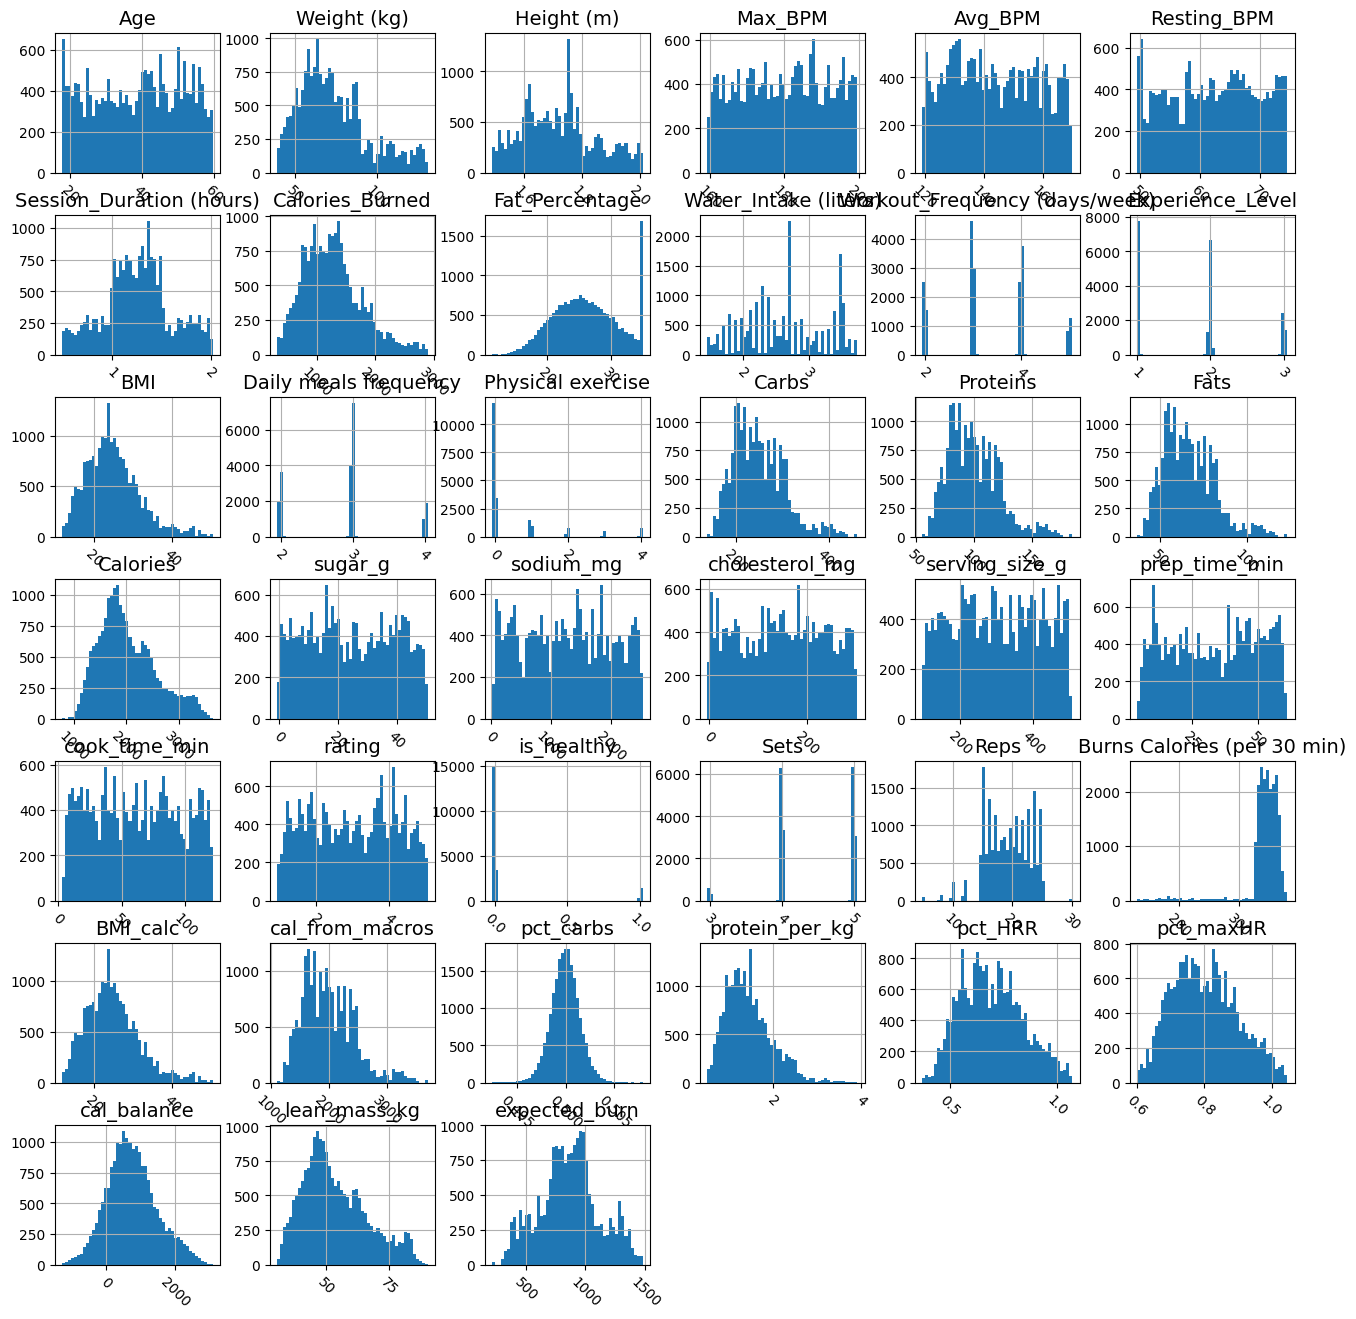

In [ ]:
# Plot histogram grid - to undestand the distribution of numerical features
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(16, 16), xrot=-45)

plt.show()

Here are some of the insight that can be infer from the above histogram grid
* Some features such as daily_meals_frequency, Sets, workout_frequency_days, experience_level, is_healthy looks more categorical than numerical. The values should be treated as discrete than floating point.
* The fat_percentage data appears to be cap at a particular - we need to understand reason behind this cap.
* The weight and height features are not normally distributed - weight looks skew
* The plot shows that we have data values on different scales - we will need to normalize this features.
* we have the weigh, height and  the BMI- we need to check if ratio of the weight and height equals the BMI given in the dataset.

In [41]:
# Create a correlation matrix to see relationships between numerical features
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),...,Burns Calories (per 30 min),BMI_calc,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn
Age,1.000000,-0.044077,-0.037096,-0.028763,0.039280,0.013387,-0.025410,-0.021396,-0.025056,0.037569,...,0.005641,-0.016938,0.052045,-0.005022,0.067281,0.044258,0.048140,-0.015984,-0.050547,-0.025910
Weight (kg),-0.044077,1.000000,0.353763,0.066898,0.016761,-0.033578,-0.002275,-0.001994,0.778875,0.397971,...,0.090584,0.855598,-0.003569,-0.001333,-0.726714,-0.016656,-0.023117,0.736698,0.981897,0.024249
Height (m),-0.037096,0.353763,1.000000,-0.014397,-0.012135,0.009897,0.006783,0.009211,-0.156586,0.398041,...,0.065279,-0.167014,0.008076,0.012513,-0.246187,-0.012385,-0.005411,0.254356,0.477397,0.029134
Max_BPM,-0.028763,0.066898,-0.014397,1.000000,-0.028047,0.035522,0.009767,0.003136,0.071926,0.041635,...,-0.022808,0.073526,-0.010566,-0.004370,-0.055962,-0.511858,-0.559433,0.043785,0.060146,0.003512
Avg_BPM,0.039280,0.016761,-0.012135,-0.028047,1.000000,0.063042,0.018553,0.007984,0.009022,0.006192,...,-0.073350,0.028931,0.033147,-0.005017,0.018102,0.856732,0.841887,0.005324,0.012083,-0.005375
Resting_BPM,0.013387,-0.033578,0.009897,0.035522,0.063042,1.000000,-0.017554,-0.001633,-0.042021,0.011676,...,0.037717,-0.040731,0.042500,-0.016604,0.065700,-0.088468,0.034978,-0.024921,-0.030811,-0.004718
Session_Duration (hours),-0.025410,-0.002275,0.006783,0.009767,0.018553,-0.017554,1.000000,0.814368,-0.034861,0.287751,...,-0.012035,-0.004282,0.010536,0.007848,-0.042841,0.017835,0.010953,-0.528619,0.025165,0.944115
Calories_Burned,-0.021396,-0.001994,0.009211,0.003136,0.007984,-0.001633,0.814368,1.000000,-0.033812,0.262731,...,0.006562,-0.004495,0.011817,0.009419,-0.035982,0.010506,0.006106,-0.660560,0.023134,0.773932
Fat_Percentage,-0.025056,0.778875,-0.156586,0.071926,0.009022,-0.042021,-0.034861,-0.033812,1.000000,0.185207,...,0.054499,0.902341,-0.012551,-0.003533,-0.603368,-0.020686,-0.030786,0.594499,0.659078,-0.018944
Water_Intake (liters),0.037569,0.397971,0.398041,0.041635,0.006192,0.011676,0.287751,0.262731,0.185207,1.000000,...,0.026161,0.214090,0.045292,0.006100,-0.281664,-0.019804,-0.018205,0.126435,0.435249,0.281376


In [ ]:
# examining the correlation of features with the target variable 'Calories'
corr_matrix = df.corr(numeric_only=True)
corr_matrix["Calories"].sort_values(ascending=False) 

Calories                         1.000000
Weight (kg)                      0.978273
lean_mass_kg                     0.962934
BMI                              0.837555
BMI_calc                         0.837554
Fat_Percentage                   0.759601
cal_balance                      0.718214
Water_Intake (liters)            0.411713
Height (m)                       0.346939
Burns Calories (per 30 min)      0.093610
Experience_Level                 0.087935
Workout_Frequency (days/week)    0.082119
expected_burn                    0.076448
Max_BPM                          0.061159
Session_Duration (hours)         0.051474
Calories_Burned                  0.047981
Daily meals frequency            0.046161
serving_size_g                   0.041314
is_healthy                       0.036042
Physical exercise                0.034065
Proteins                         0.020726
Carbs                            0.020671
cal_from_macros                  0.020660
Fats                             0

Examining the features that are strongly correlated with the target Calories
* Weight - strong positive corelation
* lean_mass - strong positive correlation
* BMI - Strong positive correlation
* BMI_calc - give shows the same correlation with target as BMI-  this shows mulitcolinearity, we should drop it
* protein_per_kg - shows a strong negative correlation with the target
* fat_percentage - strong positive correlation
* Cal_bal - strong positive correlation
* water_intake shows positive correlation
* height shows positive correlation

This feature shows some sought of relationship with the target and they will be useful for building the predictive moel.

Let's understand this relationship more by plotting a scatter matrix of this features with the target feature

In [ ]:
# identifying attributes with high positive correlation to 'Calories' (>=0.5)
corr = corr_matrix["Calories"].sort_values(ascending=False) >= 0.5
attribute= df[corr.index[corr]].columns.tolist()
attribute

['Calories',
 'Weight (kg)',
 'lean_mass_kg',
 'BMI',
 'BMI_calc',
 'Fat_Percentage',
 'cal_balance']

In [ ]:
# attributes with high correlation to 'Calories'
attribute_list = ['Calories', 'Weight (kg)', 'lean_mass_kg', 'BMI', 'BMI_calc', 'Fat_Percentage', 'cal_balance', 'protein_per_kg']

In [ ]:
# splitting the dataset into training and testing sets

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [81]:
# take a random sample of 1000 observations from the dataset for scatter matrix plot
sample_df = df.sample(1000, random_state=42)

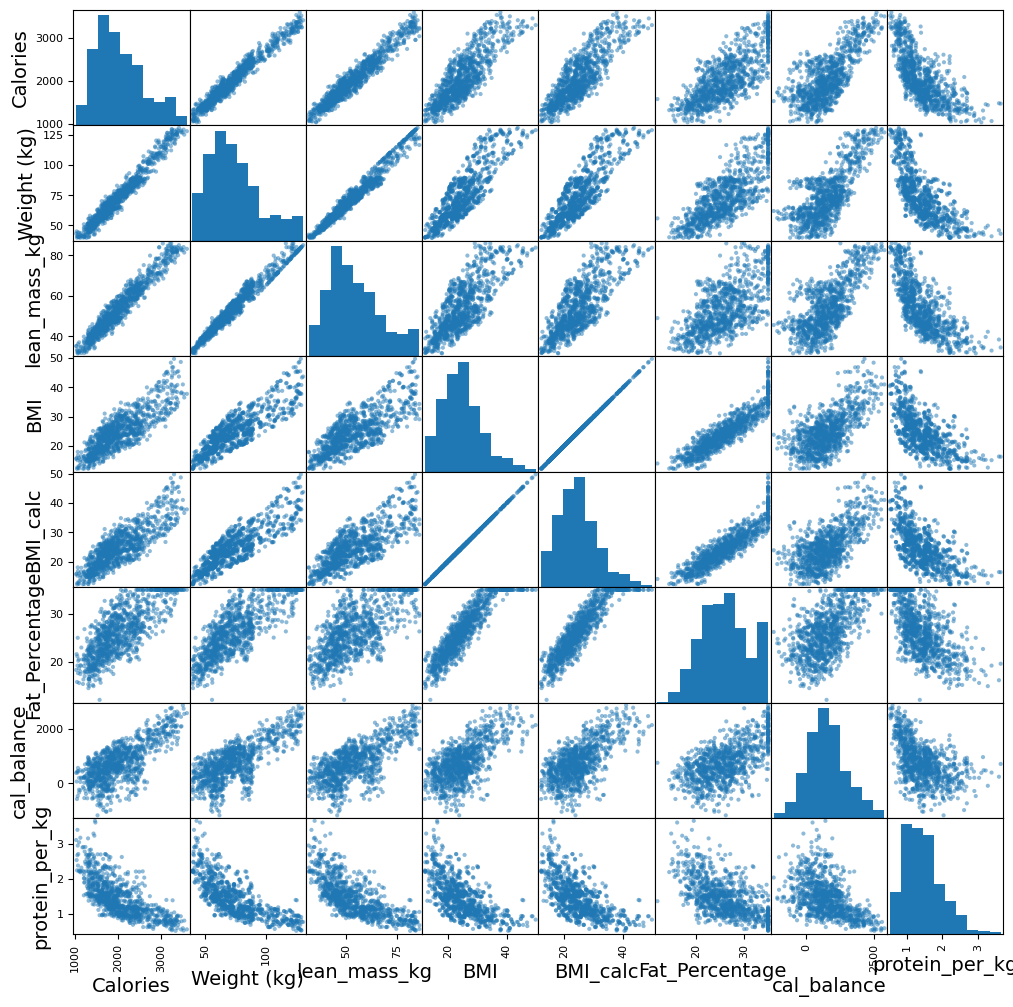

In [86]:
from pandas.plotting import scatter_matrix

scatter_matrix(sample_df[attribute_list], figsize=(12, 12))
plt.show()

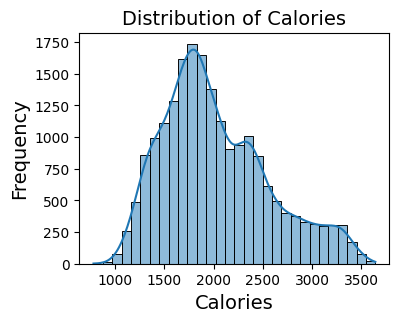

In [91]:
# plotting the distribution of the target variable 'Calories'
plt.figure(figsize=(4, 3))
sns.histplot(df['Calories'], bins=30, kde=True)
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

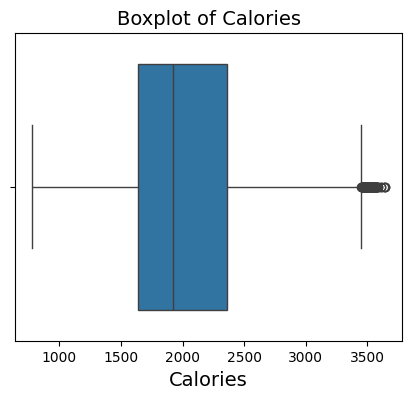

In [90]:
# boxplot to identify outliers in 'Calories'
plt.figure(figsize=(5, 4))
sns.boxplot(x=df['Calories'])
plt.title('Boxplot of Calories')
plt.xlabel('Calories')
plt.show()

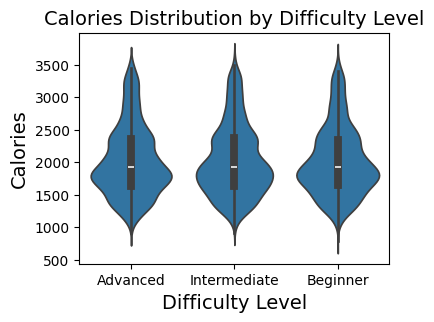

In [92]:
# plot voiolin plots to visualize the distribution of 'Calories' across different 'Difficulty Level'
plt.figure(figsize=(4,3))
sns.violinplot(x='Difficulty Level', y='Calories', data=df)
plt.title('Calories Distribution by Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Calories')
plt.show()

<Axes: xlabel='Calories'>

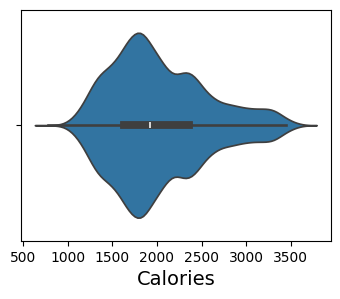

In [94]:
# violin plots to visualize the distribution of the Calories across different 'Meal Type'
plt.figure(figsize=(4,3))
sns.violinplot(x='Calories', data=df)

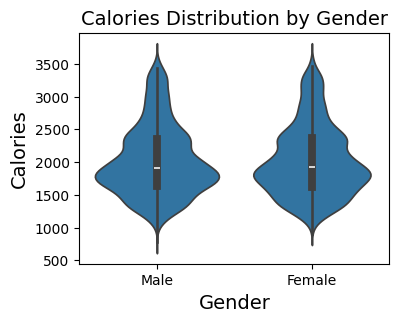

In [95]:
# voiplot of Calories across different Gender
plt.figure(figsize=(4,3))
sns.violinplot(x='Gender', y='Calories', data=df)
plt.title('Calories Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Calories')
plt.show()

In [96]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),...,Burns Calories (per 30 min),BMI_calc,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,38.851453,73.898832,1.723093,179.889702,143.704306,62.195813,1.259446,1280.109600,26.101313,2.627485,...,344.046515,24.921651,1998.297076,0.499983,1.460142,0.699005,0.802305,744.308699,53.786384,866.352318
std,12.114580,21.173010,0.127033,11.510805,14.267688,7.289351,0.341336,502.228982,4.996160,0.604724,...,32.138782,6.701144,440.848408,0.001455,0.518946,0.144880,0.096613,720.946619,12.498740,250.317069
min,18.000000,39.180000,1.490000,159.310000,119.070000,49.490000,0.490000,323.110000,11.333134,1.460000,...,128.750000,12.037907,1105.570000,0.492434,0.516706,0.371344,0.599789,-1266.220000,30.946261,219.852800
25%,28.170000,58.160000,1.620000,170.057500,131.220000,55.960000,1.050000,910.800000,22.387807,2.170000,...,337.600000,20.094975,1661.022500,0.499054,1.076294,0.583656,0.727676,261.432500,44.587037,714.098250
50%,39.865000,70.000000,1.710000,180.140000,142.990000,62.200000,1.270000,1231.450000,25.822504,2.610000,...,348.605000,24.119097,1943.130000,0.499981,1.382260,0.686284,0.794834,691.190000,51.204908,868.721400
75%,49.630000,86.100000,1.800000,189.425000,156.060000,68.090000,1.460000,1553.112500,29.676026,3.120000,...,360.472500,28.562620,2271.950000,0.500910,1.750495,0.798196,0.869211,1176.290000,61.939016,1012.532700
max,59.670000,130.770000,2.010000,199.640000,169.840000,74.500000,2.020000,2890.820000,35.000000,3.730000,...,381.710000,50.229544,3699.540000,0.507889,3.916881,1.073939,1.047032,3075.580000,90.117371,1477.108800


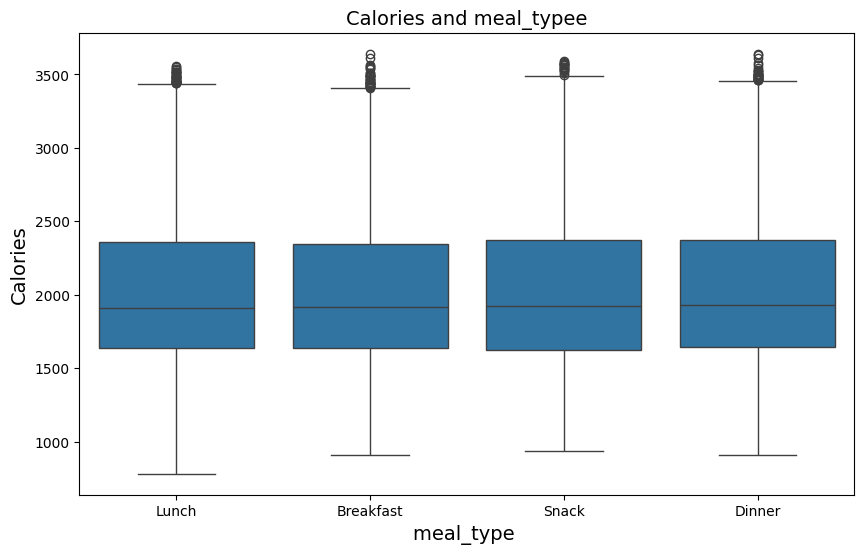

In [99]:
# Visualize the data
plt.figure(figsize=(10, 6))
sns.boxplot(x='meal_type', y='Calories', data=df)
plt.title('Calories and meal_typee')
plt.xlabel('meal_type ')
plt.ylabel('Calories')
plt.show()

In [102]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['Gender',
 'Workout_Type',
 'meal_name',
 'meal_type',
 'diet_type',
 'cooking_method',
 'Name of Exercise',
 'Benefit',
 'Target Muscle Group',
 'Equipment Needed',
 'Difficulty Level',
 'Body Part',
 'Type of Muscle',
 'Workout']

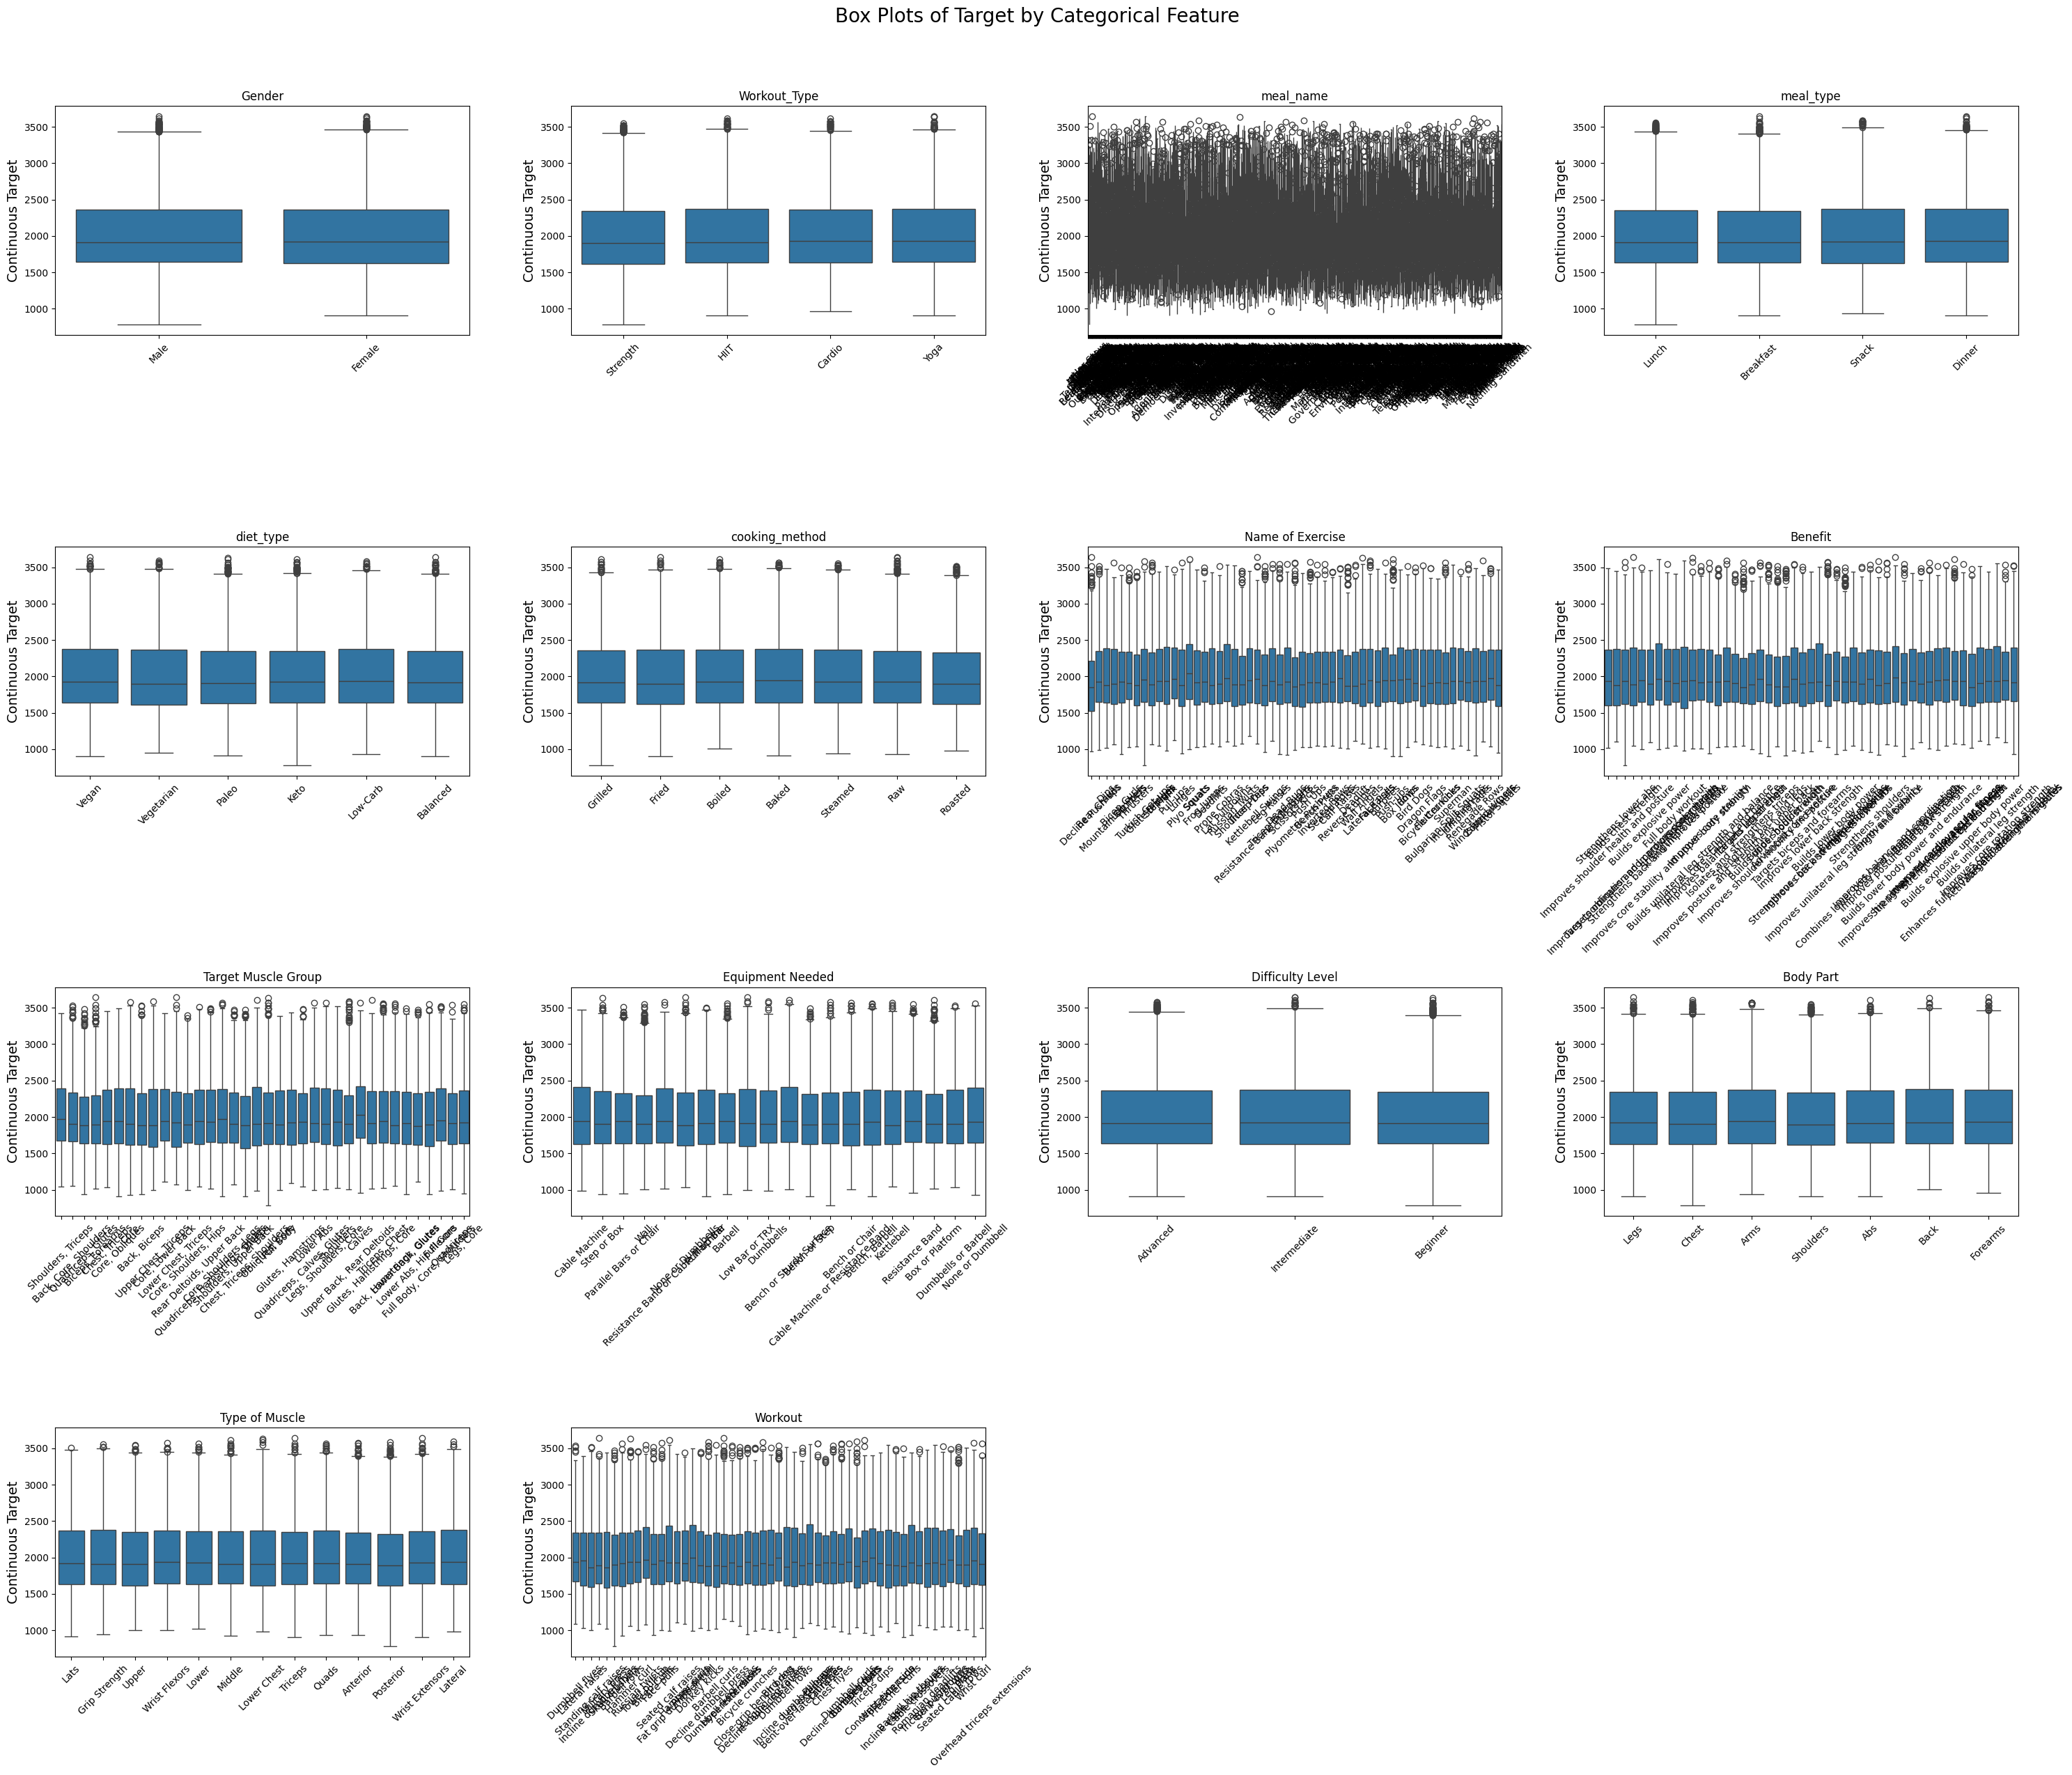

In [110]:
import math

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()



num_features = len(categorical_columns)

# Determine the grid size
# A square or near-square grid is usually best
nrows = math.ceil(math.sqrt(num_features))
ncols = math.ceil(num_features / nrows)

# Create the figure and a grid of subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(30, 25))
fig.suptitle('Box Plots of Target by Categorical Feature', fontsize=20, y=1.02)
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Plot each box plot on its own subplot
for i, feature in enumerate(categorical_columns):
    sns.boxplot(x=feature, y='Calories', data=df, ax=axes[i])
    axes[i].set_title(f'{feature}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Continuous Target')
    # Rotate x-labels for better readability if they overlap
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Adjust layout to prevent titles and labels from overlapping
plt.tight_layout()
plt.show()


This above boxplots shows appears to reveal no relationship between the categorical features and the continuous target variable 'Calories'. As all the box plots look similar with no significant differences in the distribution of 'Calories' across the different categories of each feature.
Let's quantify the relationships using Mutual Information


Mutual Information Scores:
Body_Part              0.009457
Benefit                0.006863
Equipment_Needed       0.006244
Workout                0.003618
Target_Muscle_Group    0.000183
Gender                 0.000000
cooking_method         0.000000
diet_type              0.000000
meal_type              0.000000
meal_name              0.000000
Workout_Type           0.000000
Name_of_Exercise       0.000000
Difficulty_Level       0.000000
Type_of_Muscle         0.000000
dtype: float64


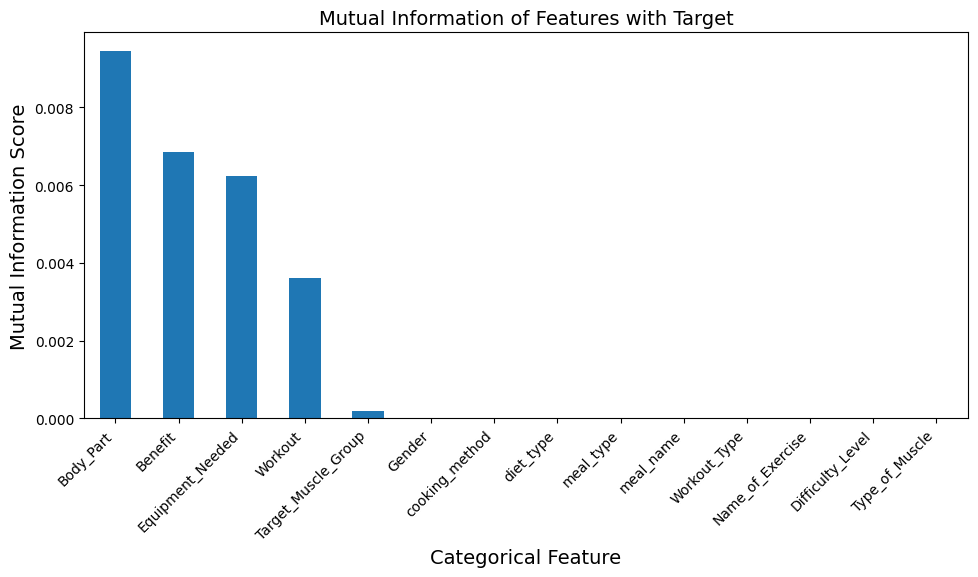

In [ ]:
from sklearn.feature_selection import mutual_info_regression

# Use the same DataFrame from the previous step
# Pre-processing for mutual information
df_encoded = df.copy()


for feature in categorical_columns:
    df_encoded[feature] = df_encoded[feature].astype('category').cat.codes

X = df_encoded[categorical_columns]
y = df_encoded['Calories']

# Calculate mutual information for all features
mi_scores = mutual_info_regression(X, y)
mi_series = pd.Series(mi_scores, index=categorical_columns).sort_values(ascending=False)

print("\nMutual Information Scores:")
print(mi_series)

# Visualize mutual information scores
plt.figure(figsize=(10, 6))
mi_series.plot.bar()
plt.title('Mutual Information of Features with Target')
plt.xlabel('Categorical Feature')
plt.ylabel('Mutual Information Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Body_part, Benefit and Equipment_Needed- these 3 features shows some predictive power from running the MI Scores

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pingouin as pg


# Create a dictionary to store new column names
new_columns = {col: col.replace(' ', '_') for col in df.columns}

# Rename the columns in your DataFrame
df = df.rename(columns=new_columns)

# Now, rerun the ANOVA loop
categorical_columns = [col.replace(' ', '_') for col in categorical_columns]




anova_results = []

for feature in categorical_columns:
    try:
        # Calculate Eta-squared (effect size) using Pingouin
        pg_results = pg.anova(dv='Calories', between=feature, data=df)
        # Use 'np2' for partial eta-squared (same as eta-squared in one-way ANOVA)
        eta_sq = pg_results['np2'].values[0]

        # Perform ANOVA test using statsmodels for p-value
        model = ols(f'Calories ~ C({feature})', data=df).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        p_value = anova_table.loc[f'C({feature})', 'PR(>F)']
        
        anova_results.append({
            'Feature': feature,
            'p-value': p_value,
            'Eta_squared': eta_sq
        })
    except Exception as e:
        print(f"Could not run ANOVA for {feature}: {e}")
        anova_results.append({
            'Feature': feature,
            'p-value': None,
            'Eta_squared': None
        })

# Create a summary DataFrame
anova_df = pd.DataFrame(anova_results)
anova_df = anova_df.sort_values(by='Eta_squared', ascending=False)

print("\nANOVA and Eta-squared Summary:")
print(anova_df)



ANOVA and Eta-squared Summary:
                Feature   p-value  Eta_squared
2             meal_name  0.983708     0.041014
7               Benefit  0.483456     0.002387
6      Name_of_Exercise  0.740394     0.002349
8   Target_Muscle_Group  0.103224     0.002293
13              Workout  0.945898     0.001838
9      Equipment_Needed  0.432113     0.000970
4             diet_type  0.020922     0.000664
5        cooking_method  0.162101     0.000461
1          Workout_Type  0.046888     0.000398
11            Body_Part  0.310307     0.000356
12       Type_of_Muscle  0.892418     0.000322
3             meal_type  0.435040     0.000137
10     Difficulty_Level  0.736935     0.000031
0                Gender  0.607181     0.000013


Quite a number of the categorical features have their mean not statistically signicant with the target as P > 0.05. However diet_type and workout_type shows some significant but has low Eta scores - showing that this effect are negligible.

In [ ]:
# splitting the dataset into training and testing sets and save them to interim folder
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
os.makedirs('../data/interim', exist_ok=True)
train_set.to_csv('../data/interim/train_set.csv', index=False)
test_set.to_csv('../data/interim/test_set.csv', index=False)